<a href="https://colab.research.google.com/github/prithwish05/-Multiple-Disease-Prediction-Using-Machine-Learning/blob/main/Multiple_Disease_Prediction_blood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [ ]:
df = pd.read_csv('Blood_samples_dataset_balanced_2(f).csv')
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [ ]:
#Verifying the shape
df.shape

(2351, 25)

 **DATA PROCESSING**

In [ ]:
# Check for missing values in the dataset
df.isnull().sum()

,0
Glucose,0
Cholesterol,0
Hemoglobin,0
Platelets,0
White Blood Cells,0
Red Blood Cells,0
Hematocrit,0
Mean Corpuscular Volume,0
Mean Corpuscular Hemoglobin,0
Mean Corpuscular Hemoglobin Concentration,0


In [ ]:
#Duplicated Values Treatment
df.drop_duplicates(inplace=True)
df.shape

(65, 25)

In [ ]:
df.describe()
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [ ]:
df["Disease"].value_counts()

,count
Disease,
Healthy,16
Diabetes,16
Anemia,16
Thalasse,14
Thromboc,3


<Axes: xlabel='Disease'>

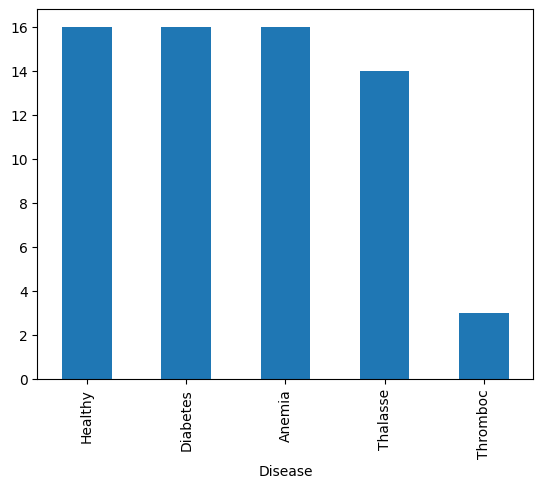

In [ ]:
df["Disease"].value_counts().plot(kind="bar")

In [ ]:
# Convert target to numerical values
df.Disease = [0 if value == "Healthy" else 1 for value in df.Disease]

In [ ]:
df["Disease"].value_counts()

,count
Disease,
1,49
0,16


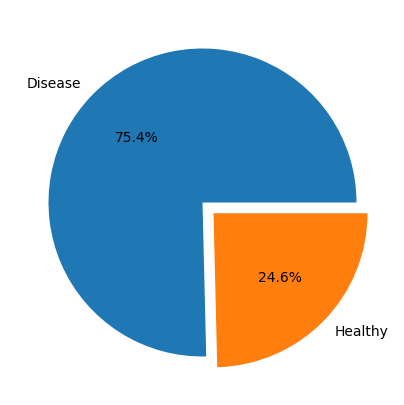

In [ ]:
plt.figure(figsize = (5,5))

labels = ['Disease','Healthy']
explode = [0, 0.1]

plt.pie(df.Disease.value_counts(), labels = labels, explode = explode, autopct = '%1.1f%%')

plt.show()

In [ ]:
# updating numerical data

X_train = df.drop('Disease', axis=1)
y_train = df['Disease']

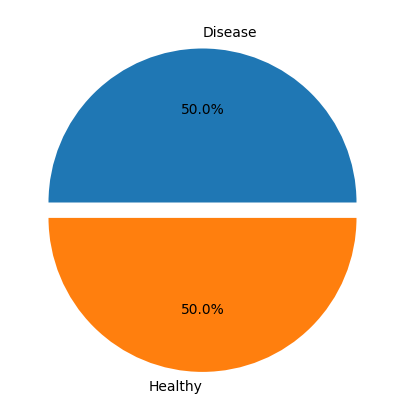

In [ ]:
# Assuming you want to use RandomOverSampler for instance
from imblearn.over_sampling import RandomOverSampler

# Instantiate the resampling method
ros = RandomOverSampler(random_state=42)  # You can change random_state if needed

# Fit and resample your training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

plt.figure(figsize = (5,5))

labels = ['Disease','Healthy']
explode = [0, 0.1]

# Now you can use y_train_resampled
plt.pie(y_train_resampled.value_counts(), labels = labels, explode = explode, autopct = '%1.1f%%')

plt.show()


**VISUALIZATION**


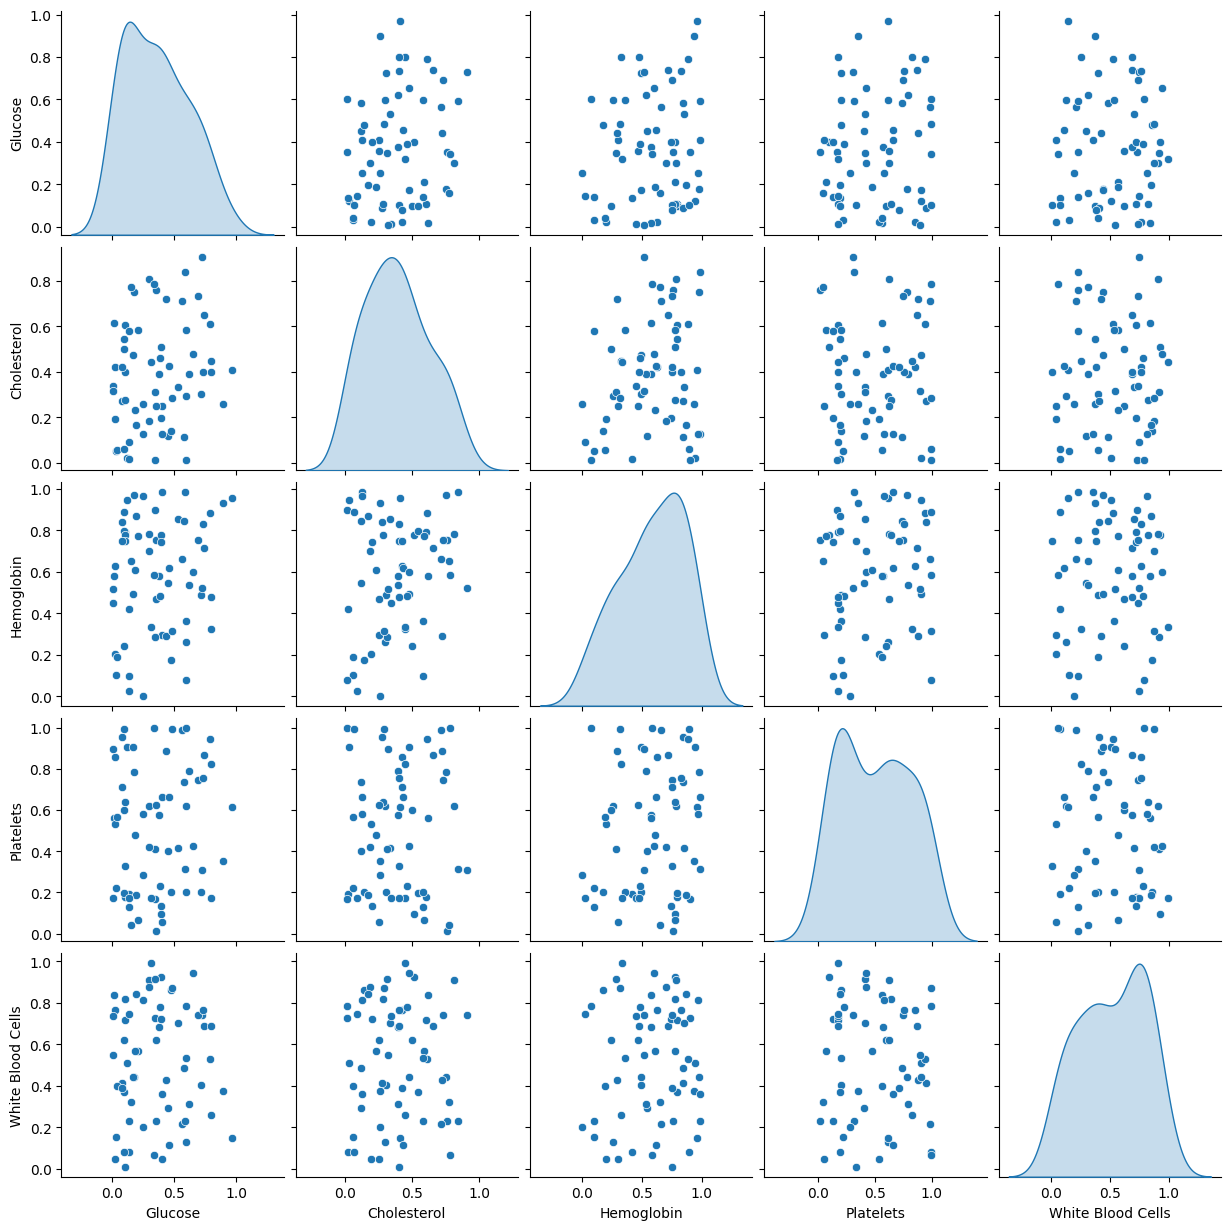

In [ ]:
numeric_features = ['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets', 'White Blood Cells']
sns.pairplot(df[numeric_features], diag_kind='kde')
plt.show()

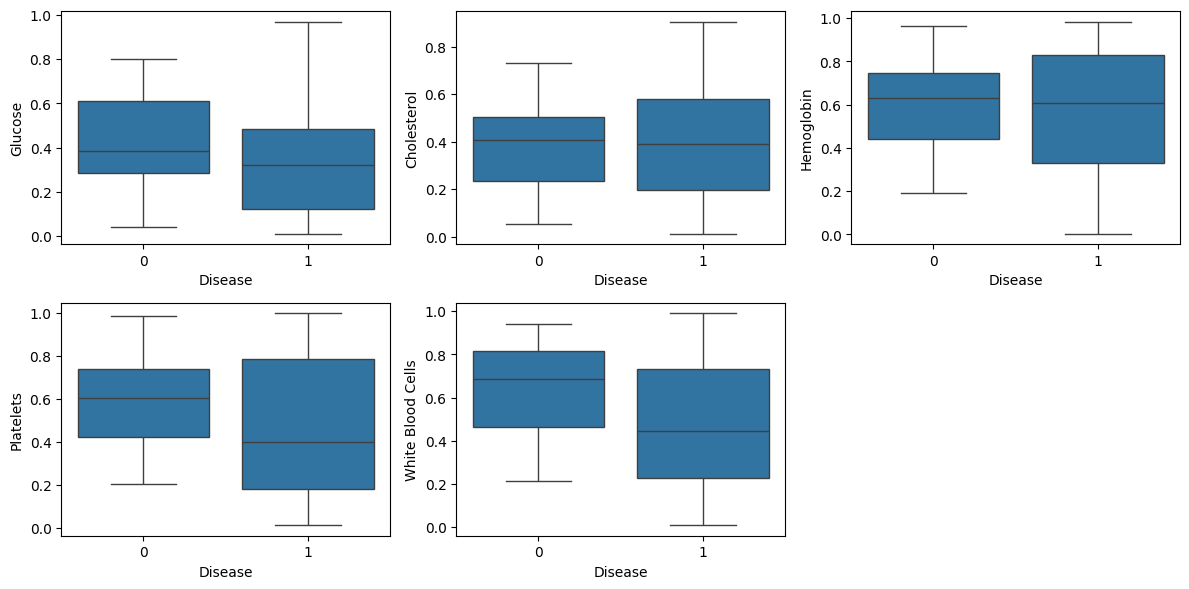

In [ ]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Disease', y=feature, data=df)
plt.tight_layout()
plt.show()

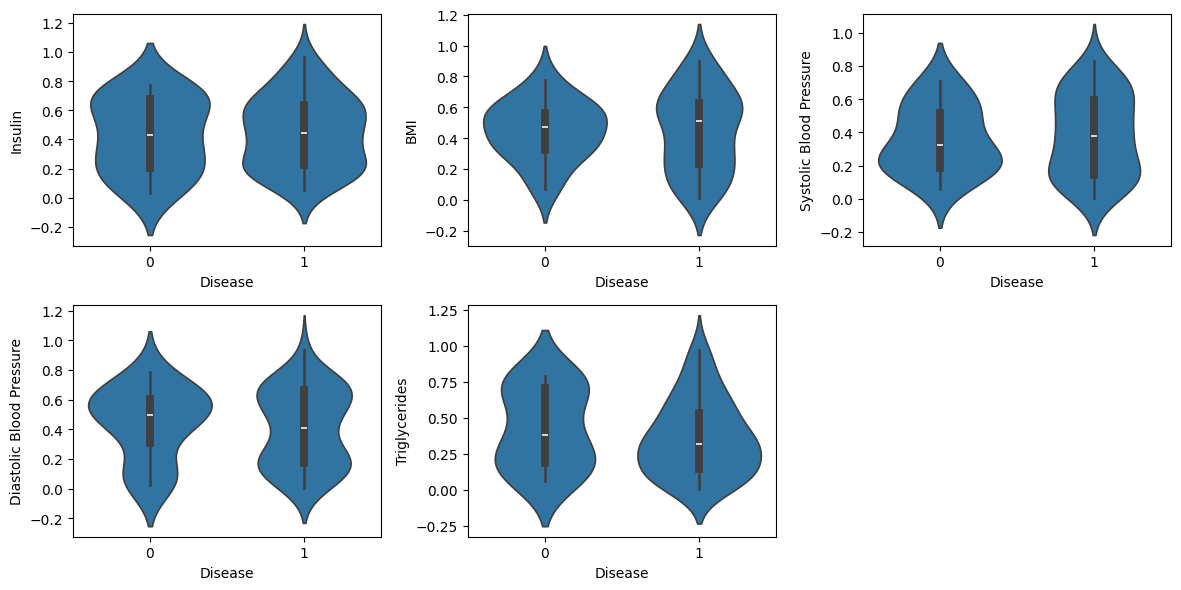

In [ ]:
sub_features = ['Insulin', 'BMI', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides']


plt.figure(figsize=(12, 6))
for i, feature in enumerate(sub_features):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='Disease', y=feature, data=df)
plt.tight_layout()
plt.show(

)

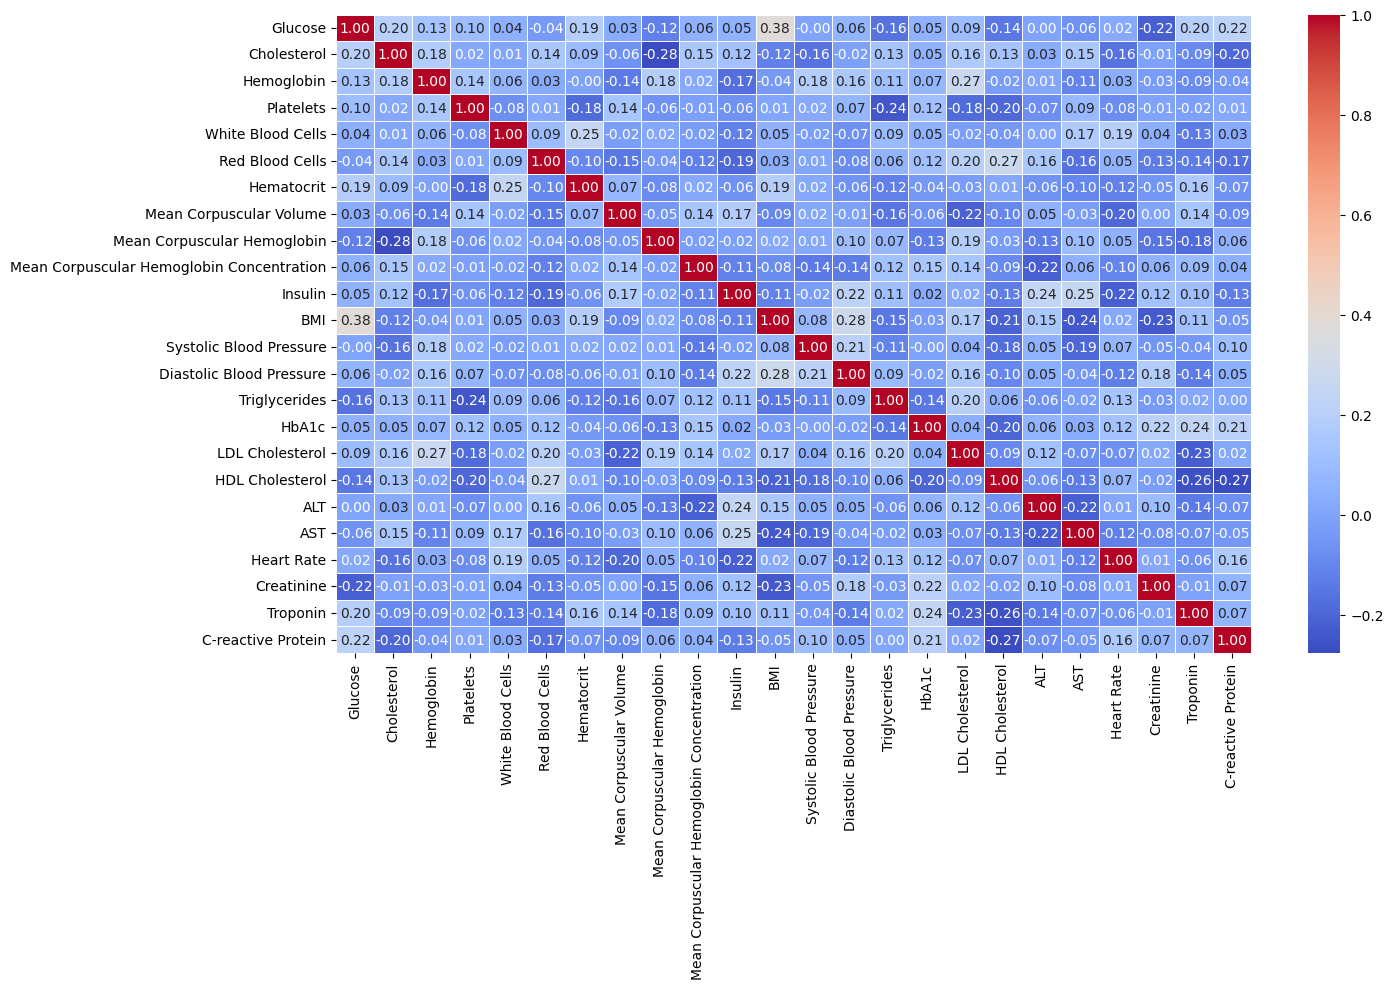

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(X_train.corr(), annot=True,cmap='coolwarm', fmt = ".2f", linewidth=0.5)

plt.tight_layout()
plt.show()

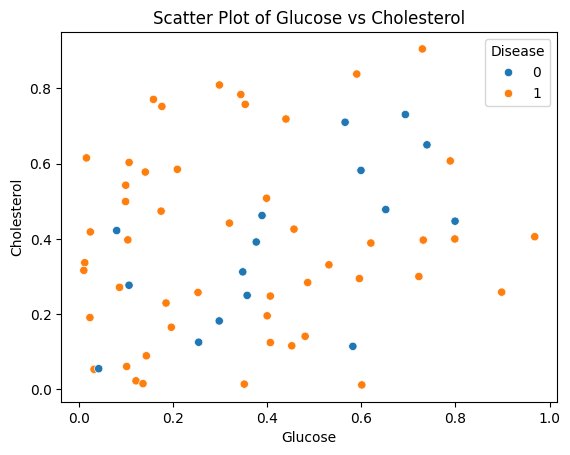

In [ ]:
sns.scatterplot(x='Glucose', y='Cholesterol', hue='Disease', data=df)
plt.xlabel('Glucose')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot of Glucose vs Cholesterol')
plt.show()


**OVERSAMPLING**

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("shape of resampled x:", X_train_resampled.shape)
print("shape of resampled y:", y_train_resampled.shape)

shape of resampled x: (98, 24)
shape of resampled y: (98,)


In [ ]:
X_train_resampled.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970


**SPLITING THE DATA**

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)


**RANDOM FOREST**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}

In [ ]:
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist_rf, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train_split, y_train_split)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, i

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [ ]:
y_val_pred_rf = random_search_rf.predict(X_val_split)
accuracy_rf = accuracy_score(y_val_split, y_val_pred_rf)
precision_rf = precision_score(y_val_split, y_val_pred_rf, average='weighted')
recall_rf = recall_score(y_val_split, y_val_pred_rf, average='weighted')
f1_rf = f1_score(y_val_split, y_val_pred_rf, average='weighted')

In [ ]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier:
Accuracy: 0.95
Precision: 0.9541666666666666
Recall: 0.95
F1 Score: 0.949616368286445


**GRADIENT BOOSTING**

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

param_dist_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [ ]:
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_gb.fit(X_train_split, y_train_split)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [ ]:
y_val_pred_gb = random_search_gb.predict(X_val_split)
accuracy_gb = accuracy_score(y_val_split, y_val_pred_gb)
precision_gb = precision_score(y_val_split, y_val_pred_gb, average='weighted')
recall_gb = recall_score(y_val_split, y_val_pred_gb, average='weighted')
f1_gb = f1_score(y_val_split, y_val_pred_gb, average='weighted')
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

Gradient Boosting Classifier:
Accuracy: 0.9
Precision: 0.9181818181818182
Recall: 0.9
F1 Score: 0.9


**SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
svm_model = SVC(random_state=42)

param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [ ]:
random_search_svm = RandomizedSearchCV(svm_model, param_distributions=param_dist_svm, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_svm.fit(X_train_split, y_train_split)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(random_state=42), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'linear']},
                   random_state=42, verbose=2)

In [ ]:
y_val_pred_svm = random_search_svm.predict(X_val_split)
accuracy_svm = accuracy_score(y_val_split, y_val_pred_svm)
precision_svm = precision_score(y_val_split, y_val_pred_svm, average='weighted')
recall_svm = recall_score(y_val_split, y_val_pred_svm, average='weighted')
f1_svm = f1_score(y_val_split, y_val_pred_svm, average='weighted')
print("Support Vector Machine Classifier:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Support Vector Machine Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**LOGISTIC REGRESSION**

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)

param_dist_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [ ]:
random_search_lr = RandomizedSearchCV(lr_model, param_distributions=param_dist_lr, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_lr.fit(X_train_split, y_train_split)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, 

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, verbose=2)

In [ ]:
y_val_pred_lr = random_search_lr.predict(X_val_split)
accuracy_lr = accuracy_score(y_val_split, y_val_pred_lr)
precision_lr = precision_score(y_val_split, y_val_pred_lr, average='weighted')
recall_lr = recall_score(y_val_split, y_val_pred_lr, average='weighted')
f1_lr = f1_score(y_val_split, y_val_pred_lr, average='weighted')
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

Logistic Regression Classifier:
Accuracy: 0.85
Precision: 0.8550000000000001
Recall: 0.85
F1 Score: 0.8503759398496241


**RESULT**

In [ ]:
results = {
    "Random Forest": {
        "Accuracy": accuracy_rf,
        "Precision": precision_rf,
        "Recall": recall_rf,
        "F1 Score": f1_rf
    },
    "Gradient Boosting": {
        "Accuracy": accuracy_gb,
        "Precision": precision_gb,
        "Recall": recall_gb,
        "F1 Score": f1_gb
    },
    "Support Vector Machine": {
        "Accuracy": accuracy_svm,
        "Precision": precision_svm,
        "Recall": recall_svm,
        "F1 Score": f1_svm
    },
    "Logistic Regression": {
        "Accuracy": accuracy_lr,
        "Precision": precision_lr,
        "Recall": recall_lr,
        "F1 Score": f1_lr
    }
}

results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  Precision  Recall  F1 Score
Random Forest               0.95   0.954167    0.95  0.949616
Gradient Boosting           0.90   0.918182    0.90  0.900000
Support Vector Machine      1.00   1.000000    1.00  1.000000
Logistic Regression         0.85   0.855000    0.85  0.850376


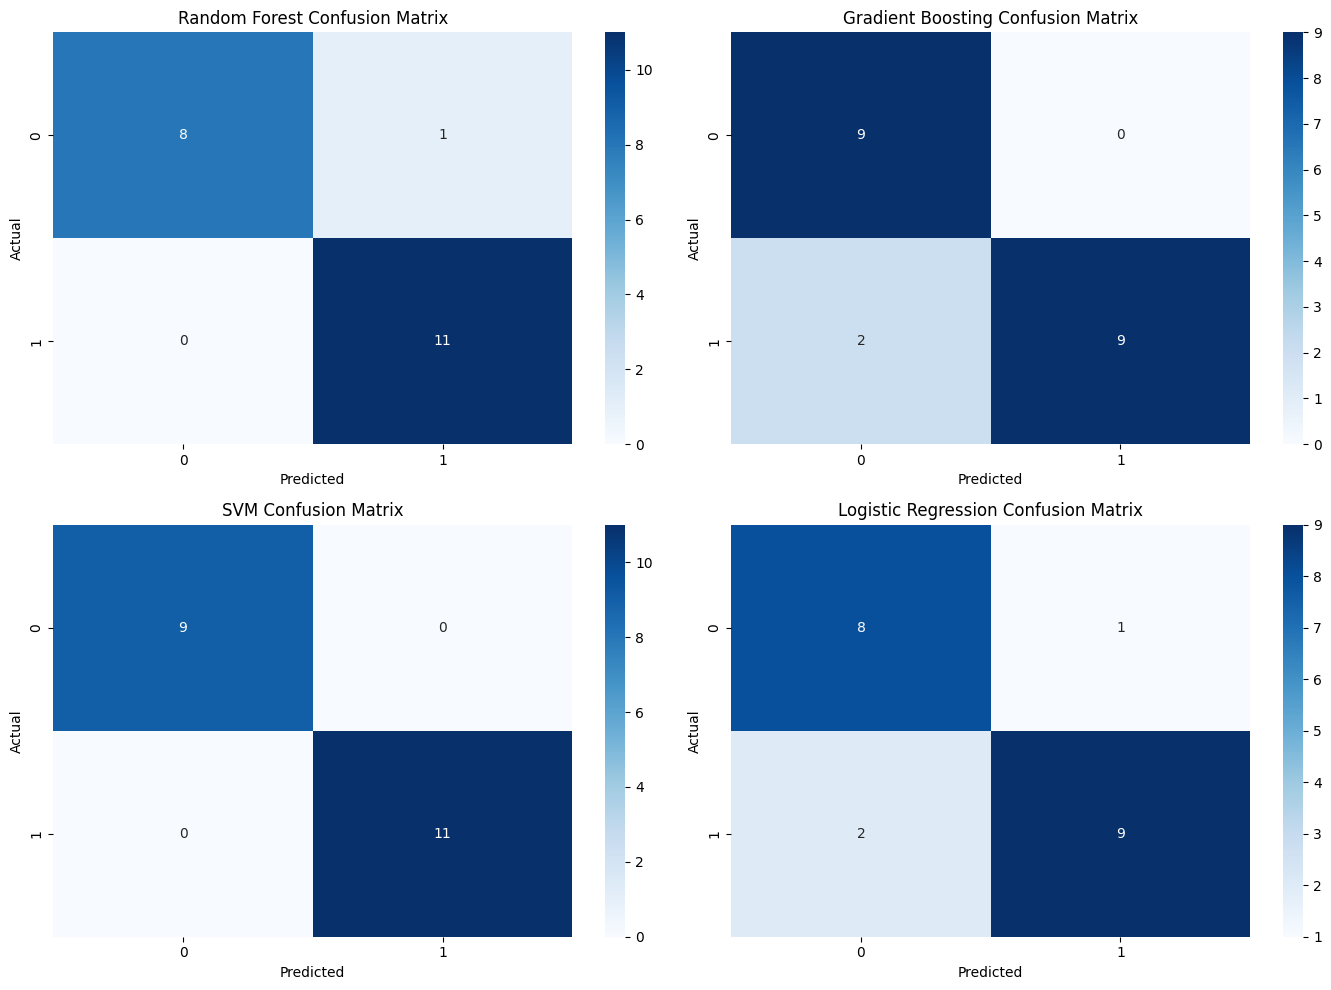

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Random Forest
sns.heatmap(confusion_matrix(y_val_split, y_val_pred_rf), annot=True, fmt='d', ax=ax[0, 0], cmap='Blues')
ax[0, 0].set_title('Random Forest Confusion Matrix')
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')

# Gradient Boosting
sns.heatmap(confusion_matrix(y_val_split, y_val_pred_gb), annot=True, fmt='d', ax=ax[0, 1], cmap='Blues')
ax[0, 1].set_title('Gradient Boosting Confusion Matrix')
ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('Actual')

# SVM
sns.heatmap(confusion_matrix(y_val_split, y_val_pred_svm), annot=True, fmt='d', ax=ax[1, 0], cmap='Blues')
ax[1, 0].set_title('SVM Confusion Matrix')
ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('Actual')

# Logistic Regression
sns.heatmap(confusion_matrix(y_val_split, y_val_pred_lr), annot=True, fmt='d', ax=ax[1, 1], cmap='Blues')
ax[1, 1].set_title('Logistic Regression Confusion Matrix')
ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2,5,7,7,8,9,63,8,2,5,9,5)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have Disease')
else:
  print('The Person has Disease')

[0]
The Person does not have Disease


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
